In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math, time, os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
# from pandas import datetime


In [2]:

if not os.path.exists(os.path.join("data/days/", "all_day_data.csv")):

    db1 = pd.read_csv("data/days/19880627-19991231 - 副本.csv", encoding='utf-8')
    db2 = pd.read_csv("data/days/20000101-20101231 - 副本.csv", encoding='utf-8')
    db3 = pd.read_csv("data/days/20110101-20201231 - 副本.csv", encoding='utf-8')
    db4 = pd.read_csv("data/days/20210101-20230720 - 副本.csv", encoding='utf-8')
    # print(db1)
    # print(db2)
    db1.to_csv('data/days/all_day_data.csv', index=False, header=True, encoding='utf_8_sig')
    db2.to_csv('data/days/all_day_data.csv', index=False, header=False, mode='a+', encoding='utf_8_sig')
    db3.to_csv('data/days/all_day_data.csv', index=False, header=False, mode='a+', encoding='utf_8_sig')
    db4.to_csv('data/days/all_day_data.csv', index=False, header=False, mode='a+', encoding='utf_8_sig')

In [3]:
db = pd.read_csv('data/days/all_day_data.csv')
print(db)

           Date  Close   Open   High    Low  Volume  Fluctuation
0     1988/6/27  15.10  15.10  15.10  15.10    0.05      -0.0351
1     1988/6/28  15.27  15.34  15.36  15.27    0.16       0.0113
2     1988/6/30  14.85  14.80  14.90  14.80    0.42      -0.0401
3      1988/7/1  14.60  14.60  14.60  14.60    0.05      -0.0168
4      1988/7/4  14.35  14.50  14.50  14.30    0.17      -0.0171
...         ...    ...    ...    ...    ...     ...          ...
8947  2023/7/12  80.11  79.32  80.55  79.21  362.33       0.0089
8948  2023/7/13  81.36  80.19  81.75  79.88  416.12       0.0156
8949  2023/7/14  79.87  81.64  81.70  79.53  311.23      -0.0183
8950  2023/7/17  78.50  79.36  80.64  78.25  341.16      -0.0172
8951  2023/7/18  79.63  78.52  79.99  78.19  366.47       0.0144

[8952 rows x 7 columns]


In [6]:
mydate = db['Date']
print(mydate)

0       1988/6/27
1       1988/6/28
2       1988/6/30
3        1988/7/1
4        1988/7/4
          ...    
8947    2023/7/12
8948    2023/7/13
8949    2023/7/14
8950    2023/7/17
8951    2023/7/18
Name: Date, Length: 8952, dtype: object


In [4]:
print(len(db), type(db))
print(db.size)
print(db.columns)
db_cor_tab = db.drop('Date', axis=1)
print(db_cor_tab.columns)
# del db_cor_tab

8952 <class 'pandas.core.frame.DataFrame'>
62664
Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Fluctuation'], dtype='object')
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Fluctuation'], dtype='object')


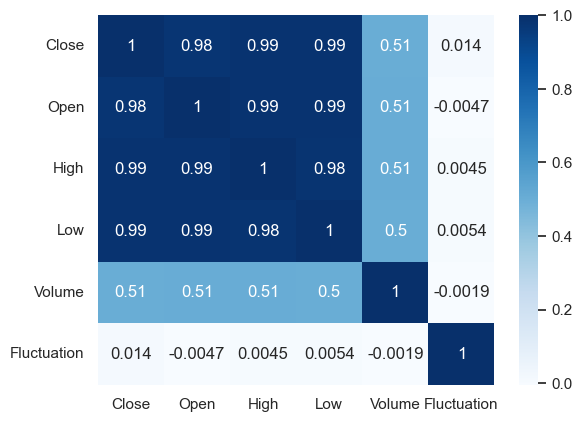

In [5]:
corr_matrix = db_cor_tab.corr('kendall')
sns.set(font_scale=1.0)
sns.heatmap(corr_matrix, cmap="Blues", annot=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()
# del corr_matrix

In [6]:
train_db = db.iloc[:int(0.8 * len(db)), :]
val_db = db.iloc[int(0.8 * len(db)):int(0.9 * len(db)), :]
test_db = db.iloc[int(0.9 * len(db)):, :]

print("Training set size:", len(train_db))
print("Validation set size:", len(val_db))
print("Testing set size:", len(test_db))

Training set size: 7161
Validation set size: 895
Testing set size: 896


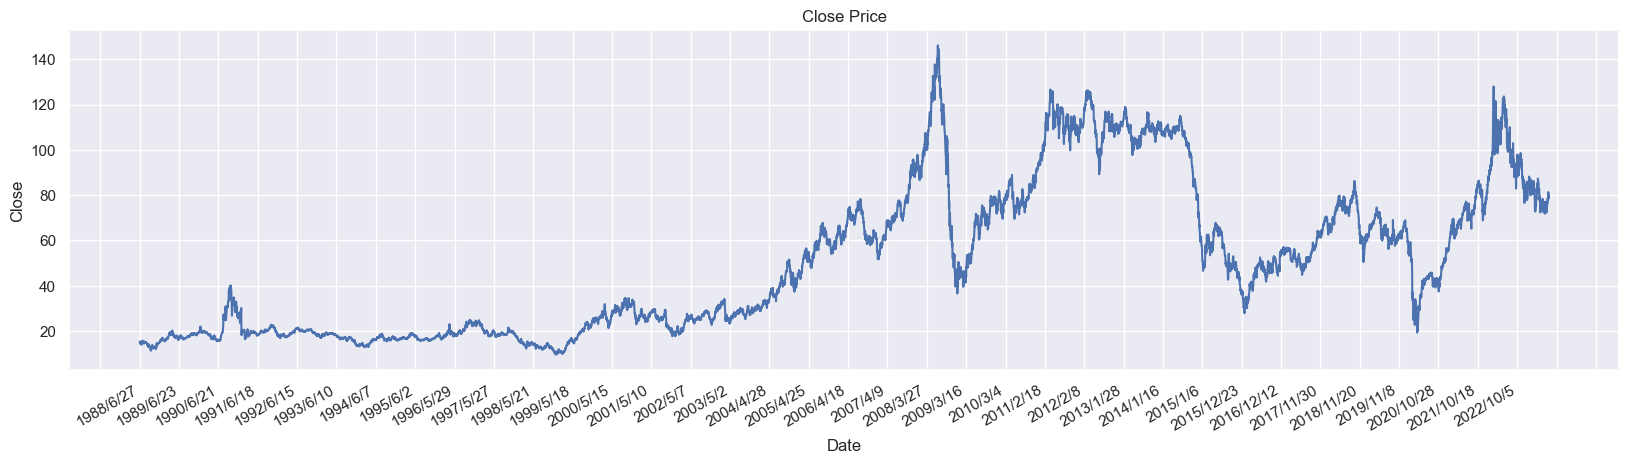

In [7]:
fig, ax0 = plt.subplots(figsize=(20,5))

# xdata = db['Date']

ax0.plot(db["Date"], db["Close"], label="Training data")

ax0.xaxis.set_major_locator(plt.MultipleLocator(250))
fig.autofmt_xdate() #自动旋转xlabel

ax0.set_title("Close Price")
ax0.set_xlabel("Date")
ax0.set_ylabel("Close")

# ax0.legend()

plt.show()

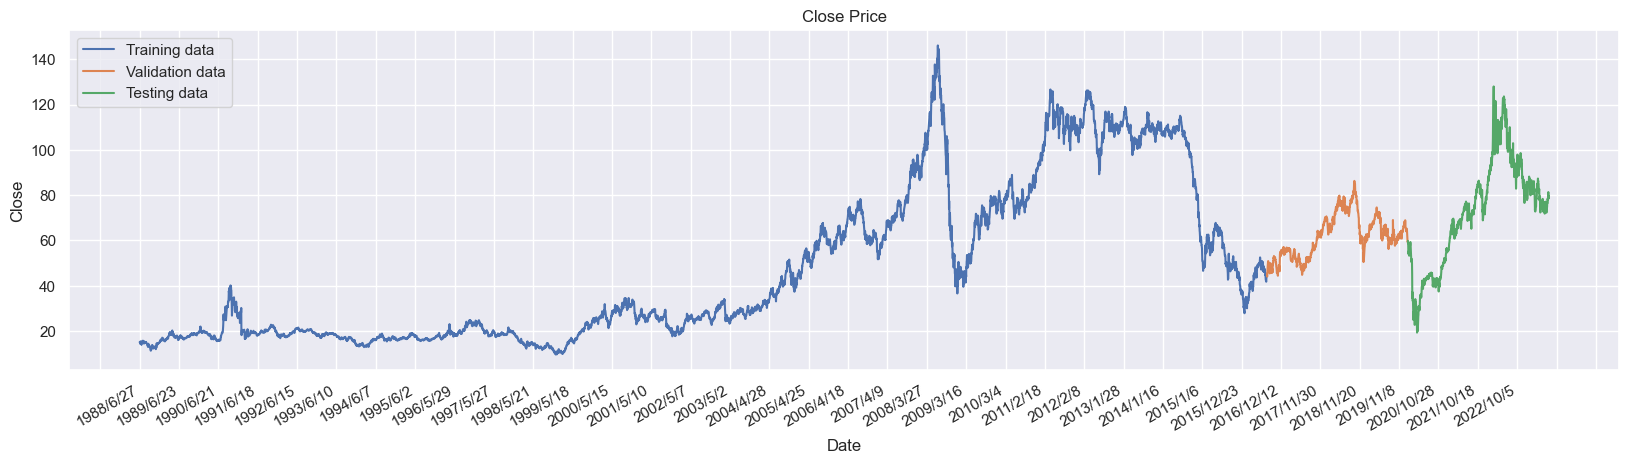

In [8]:
fig, ax0 = plt.subplots(figsize=(20,5))

# xdata = db['Date']

ax0.plot(train_db["Date"], train_db["Close"], label="Training data")
ax0.plot(val_db["Date"], val_db["Close"], label="Validation data")
ax0.plot(test_db["Date"], test_db["Close"], label="Testing data")

ax0.xaxis.set_major_locator(plt.MultipleLocator(250))
fig.autofmt_xdate() #自动旋转xlabel

ax0.set_title("Close Price")
ax0.set_xlabel("Date")
ax0.set_ylabel("Close")

ax0.legend()

plt.show()

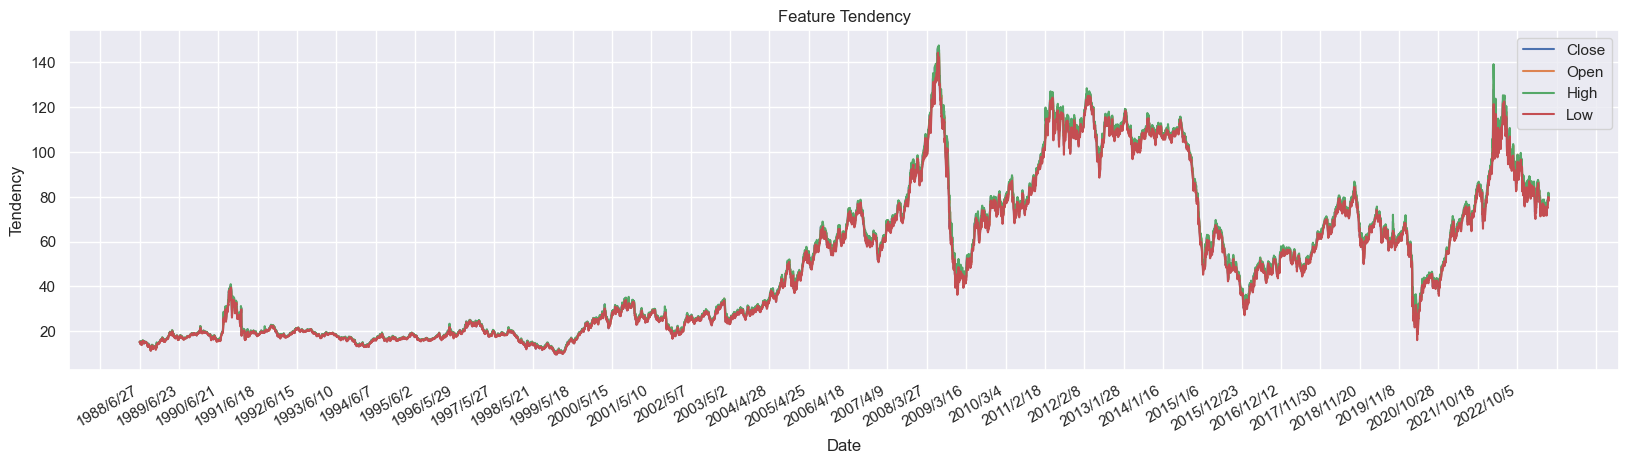

In [9]:
fig, ax1 = plt.subplots(figsize=(20,5))

# xdata = db['Date']

ax1.plot(db["Date"], db["Close"], label="Close")
ax1.plot(db["Date"], db["Open"], label="Open")
ax1.plot(db["Date"], db["High"], label="High")
ax1.plot(db["Date"], db["Low"], label="Low")

ax1.xaxis.set_major_locator(plt.MultipleLocator(250))
fig.autofmt_xdate() #自动旋转xlabel
# plt.xticks(rotation=90)

ax1.set_title("Feature Tendency")
ax1.set_xlabel("Date")
ax1.set_ylabel("Tendency")

ax1.legend()

plt.show()

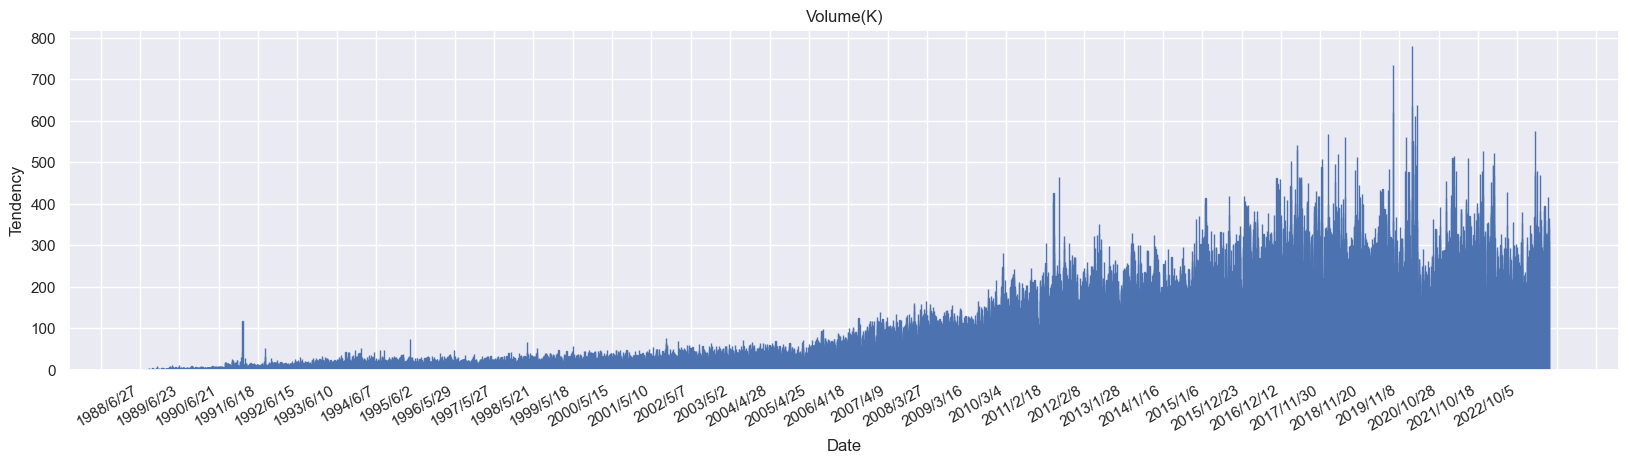

In [10]:
fig, ax3 = plt.subplots(figsize=(20,5))

# xdata = db['Date']

# ax3.plot(db["Date"], db["Volume"], label="Volume(K)")
bar2=ax3.bar(db["Date"], db["Volume"], edgecolor='b')

ax3.xaxis.set_major_locator(plt.MultipleLocator(250))
fig.autofmt_xdate() #自动旋转xlabel
# plt.xticks(rotation=90)

ax3.set_title("Volume(K)")
ax3.set_xlabel("Date")
ax3.set_ylabel("Tendency")

# ax3.legend()

plt.show()

In [11]:
print(torch.empty(2,2).random_(0,3).type())

torch.FloatTensor


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


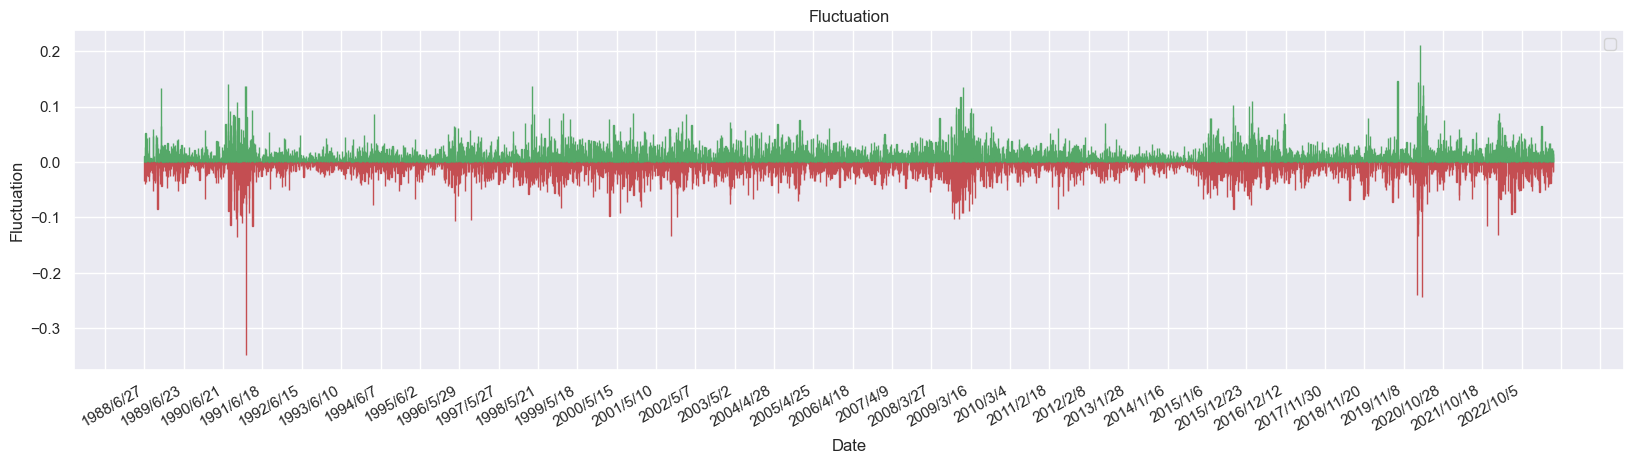

In [12]:
fig, ax2 = plt.subplots(figsize=(20,5))

bar1=ax2.bar(db["Date"], db["Fluctuation"],
            # color=np.where(db["Fluctuation"]>0,'r','b'), #判断大于0的为红色，负的为蓝色
            # width=0.55,   #柱形宽度
            # align='edge', #柱形的位置edge/center 
            # alpha=0.8,    #柱形透明度
            # hatch='*',    #柱形表明的形状样式
            # edgecolor='b',#柱形边缘颜色
            edgecolor=np.where(db["Fluctuation"]>0,'g','r')
            # bottom=0.01   #柱形离底部的距离
          )
# 设置x轴刻度间距
ax2.xaxis.set_major_locator(plt.MultipleLocator(250))
fig.autofmt_xdate() #自动旋转xlabel

ax2.set_title("Fluctuation")
ax2.set_xlabel("Date")
ax2.set_ylabel("Fluctuation")

ax2.legend()

plt.show()

In [13]:
# 数据转换
train_data = np.array(train_db.drop('Date', axis=1))
train_data = torch.from_numpy(train_data).float()
print("train_data.shape:", train_data.shape)

val_data = np.array(val_db.drop('Date', axis=1))
val_data = torch.from_numpy(val_data).float()
print("val_data.shape:", val_data.shape)

test_data = np.array(test_db.drop('Date', axis=1))
test_data = torch.from_numpy(test_data).float()
print("test_data.shape:", test_data.shape)


train_data.shape: torch.Size([7161, 6])
val_data.shape: torch.Size([895, 6])
test_data.shape: torch.Size([896, 6])


In [14]:

import torch
import torch.nn as nn
import numpy as np
a = np.array([[1, 20, 3, 4],
               [5, 6, 7, 8,],
               [9, 10, 11, 12]], dtype=np.double)
b = torch.from_numpy(a).type(torch.FloatTensor)

layer_norm = nn.LayerNorm(4, eps=1e-6) # 最后一个维度大小为4，因此normalized_shape是4
c = layer_norm(b)
print(a.shape[a.ndim - 1])

4


In [15]:
mean_a = np.mean(a, axis=1)  # 计算最后一个维度的均值 = [7. 6.5 10.5]
var_a = np.var(a, axis=1)    # 计算最后一个维度的方差 = [57.5 1.25 1.25]
# 对最后一个维度做标准化 减均值后除以标准差
a[0, :] = (a[0, :] - mean_a[0]) / np.sqrt(var_a[0])
a[1, :] = (a[1, :] - mean_a[1]) / np.sqrt(var_a[1])
a[2, :] = (a[2, :] - mean_a[2]) / np.sqrt(var_a[2])
print(a)


[[-0.79125657  1.71438923 -0.52750438 -0.39562828]
 [-1.34164079 -0.4472136   0.4472136   1.34164079]
 [-1.34164079 -0.4472136   0.4472136   1.34164079]]


In [16]:
print(train_data)

tensor([[ 1.5100e+01,  1.5100e+01,  1.5100e+01,  1.5100e+01,  5.0000e-02,
         -3.5100e-02],
        [ 1.5270e+01,  1.5340e+01,  1.5360e+01,  1.5270e+01,  1.6000e-01,
          1.1300e-02],
        [ 1.4850e+01,  1.4800e+01,  1.4900e+01,  1.4800e+01,  4.2000e-01,
         -4.0100e-02],
        ...,
        [ 4.4290e+01,  4.3360e+01,  4.4340e+01,  4.2510e+01,  2.7642e+02,
          2.7600e-02],
        [ 4.4270e+01,  4.4180e+01,  4.4490e+01,  4.3510e+01,  2.3687e+02,
         -5.0000e-04],
        [ 4.5390e+01,  4.4340e+01,  4.5710e+01,  4.4240e+01,  2.2151e+02,
          2.5300e-02]])


[[ 0.7071024   0.7071024   0.7071024   0.7071024  -1.4082245  -1.4201856 ]
 [ 0.7015133   0.7112665   0.71405315  0.7015133  -1.4038136  -1.4245324 ]
 [ 0.7087774   0.7015376   0.716017    0.7015376  -1.3806245  -1.447245  ]
 ...
 [-0.33770066 -0.34787503 -0.33715367 -0.35717422  2.201843   -0.8219392 ]
 [-0.32039273 -0.32156408 -0.31752932 -0.33028442  2.1863585  -0.89658755]
 [-0.3022017  -0.31697464 -0.29769945 -0.31838155  2.1757169  -0.9404599 ]]


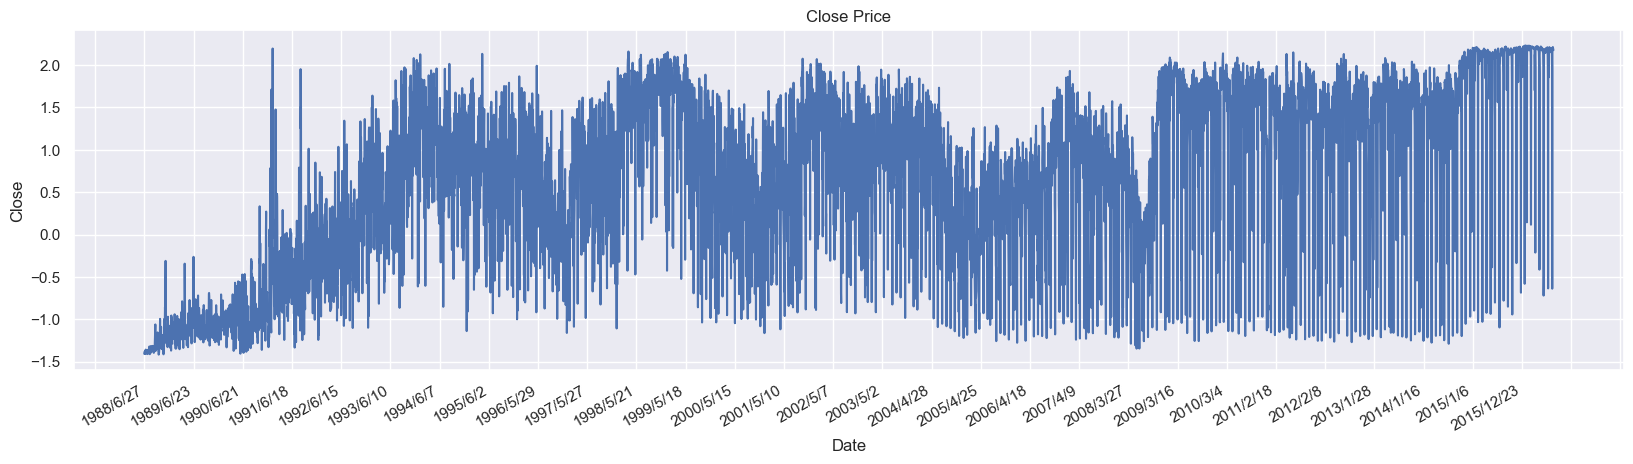

In [17]:
norm = nn.LayerNorm(6)
temp_data = norm(train_data)
# print(temp_data)
temp_data = temp_data.detach().numpy()
print(temp_data)

fig, ax_temp = plt.subplots(figsize=(20,5))

ax_temp.plot(train_db["Date"], temp_data[:,4], label="Training data")

ax_temp.xaxis.set_major_locator(plt.MultipleLocator(250))
fig.autofmt_xdate() #自动旋转xlabel

ax_temp.set_title("Close Price")
ax_temp.set_xlabel("Date")
ax_temp.set_ylabel("Close")

# ax_temp.legend()

plt.show()

del temp_data, ax_temp, norm

In [18]:
train_x = train_data.unsqueeze(1)
print(train_x)
train_y = train_data[:,0]
print("train_x:",train_x.shape, "train_y:", train_y.shape)

val_x = val_data.unsqueeze(1)
val_y = val_data[:,0]
print("val_x:",val_x.shape, "val_y:", val_y.shape)

test_x = test_data.unsqueeze(1)
test_y = test_data[:,0]
print("test_x:",test_x.shape, "test_y:", test_y.shape)

tensor([[[ 1.5100e+01,  1.5100e+01,  1.5100e+01,  1.5100e+01,  5.0000e-02,
          -3.5100e-02]],

        [[ 1.5270e+01,  1.5340e+01,  1.5360e+01,  1.5270e+01,  1.6000e-01,
           1.1300e-02]],

        [[ 1.4850e+01,  1.4800e+01,  1.4900e+01,  1.4800e+01,  4.2000e-01,
          -4.0100e-02]],

        ...,

        [[ 4.4290e+01,  4.3360e+01,  4.4340e+01,  4.2510e+01,  2.7642e+02,
           2.7600e-02]],

        [[ 4.4270e+01,  4.4180e+01,  4.4490e+01,  4.3510e+01,  2.3687e+02,
          -5.0000e-04]],

        [[ 4.5390e+01,  4.4340e+01,  4.5710e+01,  4.4240e+01,  2.2151e+02,
           2.5300e-02]]])
train_x: torch.Size([7161, 1, 6]) train_y: torch.Size([7161])
val_x: torch.Size([895, 1, 6]) val_y: torch.Size([895])
test_x: torch.Size([896, 1, 6]) test_y: torch.Size([896])


In [19]:
hidden_dim = [128, 128]
dense_dim = []

class OilPricePre(nn.Module):

    def __init__(self, input_size, hidden_dim, dense_dim, dr=0.5):

        super(OilPricePre, self).__init__()

        # self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.layer_norm = nn.LayerNorm(input_size)

        self.lstm1 = nn.LSTM(
            input_size,
            hidden_dim[0], 
            num_layers=1,
            # bidirectional=True, 
            dropout=0.5
        )
        for p in self.lstm1.parameters():
          nn.init.normal_(p, mean=0.0, std=0.001)

        self.lstm2 = nn.LSTM(
            hidden_dim[0], 
            hidden_dim[1], 
            num_layers=1,
            # bidirectional=True, 
            dropout=0.5
        )
        for p in self.lstm2.parameters():
          nn.init.normal_(p, mean=0.0, std=0.001)

        # self.dense = nn.Linear(hidden_dim*2, 1)

        self.dense1 = nn.Linear(hidden_dim[0], dense_dim[0])
        self.dense2 = nn.Linear(dense_dim[1], 1)

        self.dropout = nn.Dropout(dr)

    def forward(self, x):

        out = self.layer_norm(x)
        out = self.lstm1(out)
        out = self.layer_norm(out)
        out = self.dropout(out)
        out = self.lstm2(out)
        out = self.layer_norm(out)
        out = self.dropout(out)
        out = self.dense1(out)
        out = F.relu(out)
        out = self.dense2(out)
        



In [20]:
# class OilPricePre(nn.Module):

#     def __init__(self, vocab_size, embedding_dim, hidden_dim):

#         super(OilPricePre, self).__init__()

#         self.embedding = nn.Embedding(vocab_size, embedding_dim)

#         self.lstm = nn.LSTM(
#             embedding_dim, 
#             hidden_dim, 
#             num_layers=2,
#             # bidirectional=True, 
#             dropout=0.5
#         )

#         self.dense = nn.Linear(hidden_dim*2, 1)

#         self.dense = nn.Linear(hidden_dim, 1)

#         self.dropout = nn.Dropout(0.5)

In [21]:
input_size = 1
hidden_size = 16
output_size = 1
lr=0.01
dr = 0.5

model = OilPricePre()
criteon = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)

TypeError: OilPricePre.__init__() missing 3 required positional arguments: 'input_size', 'hidden_dim', and 'dense_dim'

In [ ]:
def train(x, y, model, iterator, optimizer, criteon, epochs):

    model.train()

    for epoch in range(epochs):
        pass